# Bell States Generation using Qiskit


**Author:** Supraja Ravichandran

## Introduction

Bell states are maximally entangled 2-qubit states that play a central role in:

- Quantum teleportation  
- Superdense coding  
- Quantum key distribution (BB84)  
- Studying entanglement and non-locality

The four states are defined as:

1.  **$|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$** (The standard EPR pair)
2.  **$|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$** (Phase flip)
3.  **$|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$** (Bit flip)
4.  **$|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$** (Bit + Phase flip)

In this notebook, I construct these states using Hadamard, CNOT, Pauli-X, and Pauli-Z gates and verify their entanglement using Purity metrics.

In [1]:
# Imports and Setup
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import YGate
from qiskit.circuit.library import CXGate
from qiskit.circuit.library import ZGate
from qiskit.circuit.library import HGate
from qiskit.circuit.library import XGate
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import partial_trace
from qiskit.visualization import plot_bloch_multivector
from math import pi
import matplotlib.pyplot as plt

# Initialize Registers
q=QuantumRegister(2)
qc0=QuantumCircuit(q)
qc1=QuantumCircuit(q)
qc2=QuantumCircuit(q)
qc3=QuantumCircuit(q)

## Circuit Construction
We generate the four states by starting with the standard Bell circuit ($H$ followed by CNOT) and applying specific transformations:
* **$|\Phi^+\rangle$:** Standard Circuit
* **$|\Phi^-\rangle$:** Standard + Z-gate on Qubit 0 (Phase Flip)
* **$|\Psi^+\rangle$:** Standard + X-gate on Qubit 1 (Bit Flip)
* **$|\Psi^-\rangle$:** Standard + Z-gate on Qubit 0 + X-gate on Qubit 1

In [2]:
# Phi_+
qc0.append(HGate(), [0])
qc0.append(CXGate(), [0,1])

## Statevector Output

Here we print the symbolic (LaTeX) form of each Bell state using Qiskit's `Statevector`.

In [3]:
phi_plus=Statevector(qc0)
phi_plus.draw("latex", prefix="\\phi_+=")

<IPython.core.display.Latex object>

In [4]:
#Phi_-
qc1.append(HGate(), [0])
qc1.append(CXGate(), [0,1])
qc1.append(ZGate(), [0])

In [5]:
phi_minus=Statevector(qc1)
phi_minus.draw("latex", prefix="\\phi_-=")

<IPython.core.display.Latex object>

In [6]:
#Psi_+
qc2.append(HGate(), [0])
qc2.append(CXGate(), [0,1])
qc2.append(XGate(), [1])

In [7]:
psi_plus=Statevector(qc2)
psi_plus.draw("latex", prefix="\\psi_+=")

<IPython.core.display.Latex object>

In [8]:
#Psi_-
qc3.append(HGate(), [0])
qc3.append(CXGate(), [0,1])
qc3.append(ZGate(), [0])
qc3.append(XGate(), [1])

In [9]:
psi_minus=Statevector(qc3)
psi_minus.draw("latex", prefix="\\psi_-=")

<IPython.core.display.Latex object>

## Bell State Circuit Diagrams

The circuits for each state are shown below.

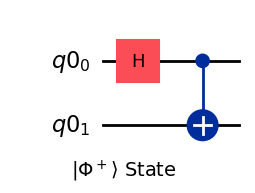

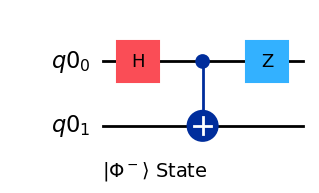

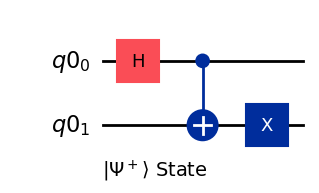

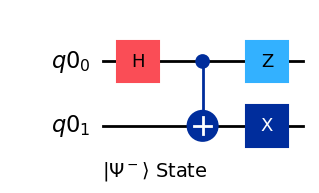

In [10]:
# 1. Generate the figures but assign them to variables
fig0 = qc0.draw("mpl")
fig1 = qc1.draw("mpl")
fig2 = qc2.draw("mpl")
fig3 = qc3.draw("mpl")

# 2. Add text to the bottom of each figure
# arguments: (x, y, text, horizontalalignment, fontsize)
# (0.5, 0.05) means: Center of X-axis, 5% from the bottom of Y-axis
fig0.text(0.5, 0.05, r"$|\Phi^+\rangle$ State", ha='center', fontsize=14)
fig1.text(0.5, 0.05, r"$|\Phi^-\rangle$ State", ha='center', fontsize=14)
fig2.text(0.5, 0.05, r"$|\Psi^+\rangle$ State", ha='center', fontsize=14)
fig3.text(0.5, 0.05, r"$|\Psi^-\rangle$ State", ha='center', fontsize=14)

# 3. Display them
display(fig0, fig1, fig2, fig3)

## Visualizing Entanglement: The Disappearing Vectors

We use `plot_bloch_multivector` to visualize the state of individual qubits.

**Expected Result:**
For all four Bell states, the Bloch vectors for Qubit 0 and Qubit 1 will shrink to zero (appearing as "empty" spheres).

**Interpretation:**
This visual "disappearance" is the signature of maximal entanglement.
* The Bloch sphere represents the **reduced density matrix** of a single qubit.
* In a Bell state, the individual qubits do not possess a definite state (Purity = 0.5). They are in the **Maximally Mixed State**.
* The information of the system is not stored in the *parts*, but in the *correlations* between them. Therefore, a local view (single Bloch sphere) sees nothing but random noise.

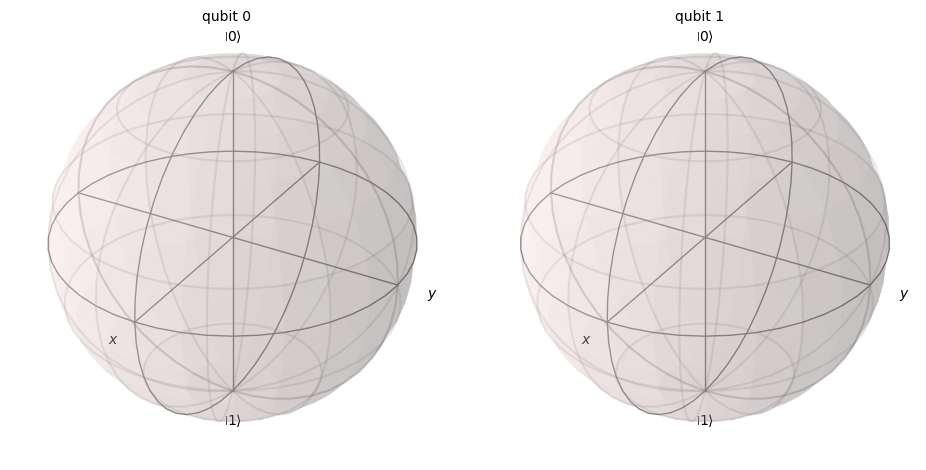

In [11]:
plot_bloch_multivector(qc0)

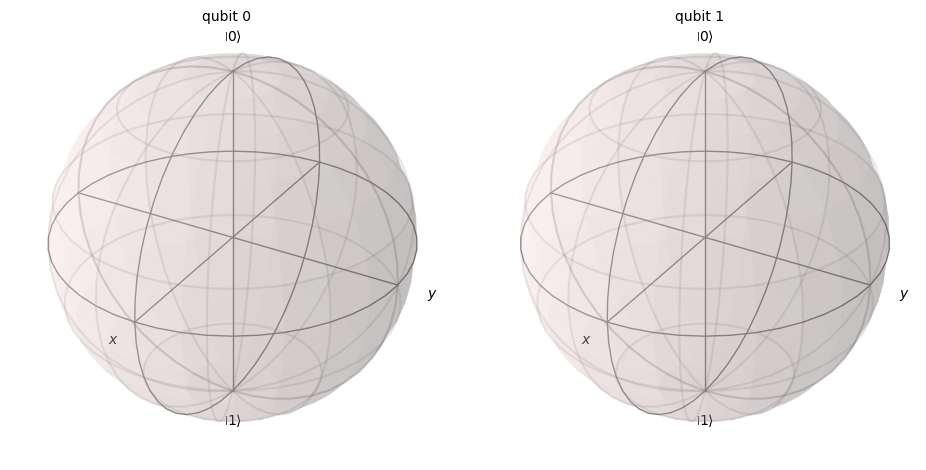

In [12]:
plot_bloch_multivector(qc1)

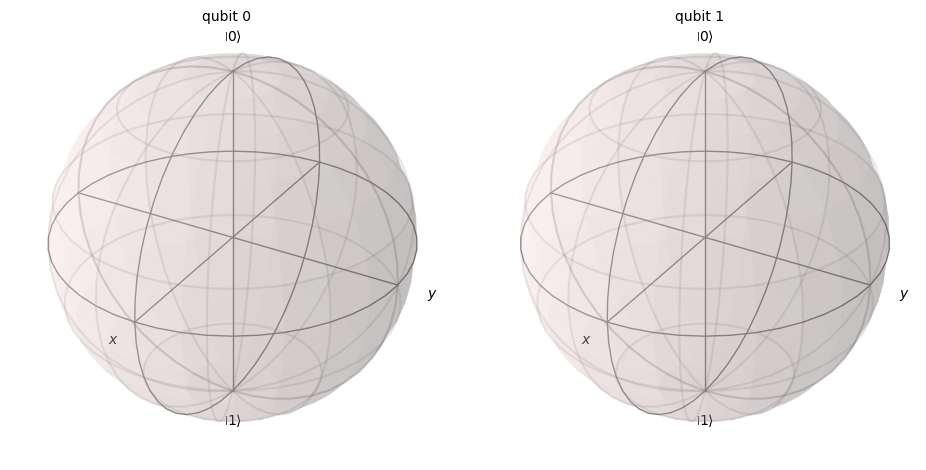

In [13]:
plot_bloch_multivector(qc2)

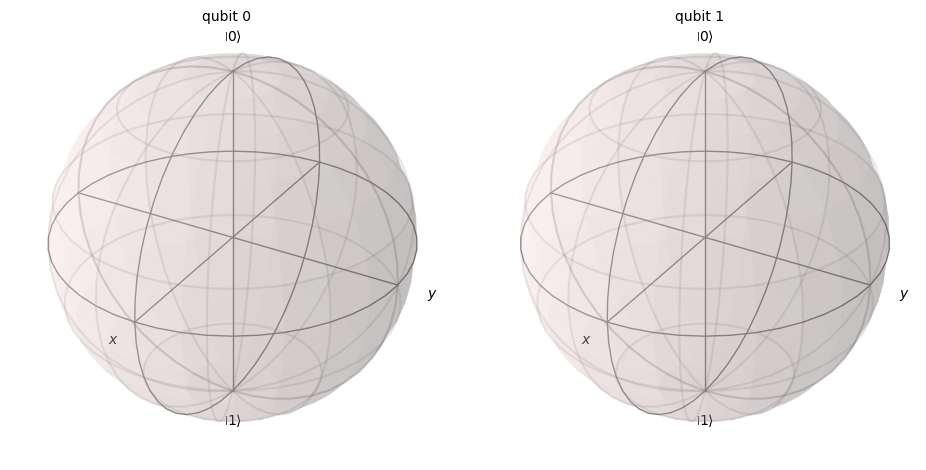

In [14]:
plot_bloch_multivector(qc3)

## Purity Calculation
Since the Bloch spheres show "mixed" states for the individual qubits, we must verify that the **global system** is still pure.

We calculate the Purity $\gamma = \text{Tr}(\rho^2)$.
* $\gamma = 1.0$: The state is Pure (lossless, coherent).
* $\gamma < 1.0$: The state is Mixed (noisy).

In [15]:
print("\\phi_+ - purity:", phi_plus.purity())
print("\\phi_- - purity:", phi_minus.purity())
print("\\psi_+ - purity:", psi_plus.purity())
print("\\psi_- - purity:", psi_minus.purity())

\phi_+ - purity: 0.9999999999999996
\phi_- - purity: 0.9999999999999996
\psi_+ - purity: 0.9999999999999996
\psi_- - purity: 0.9999999999999996


## Conclusion

In this notebook we:

- Constructed all four Bell states  
- Visualized circuits and Bloch vectors  
- Verified purity ~ 1  
- Confirmed entanglement through the mixed Bloch states  

This forms the foundation for experiments in teleportation, superdense coding,  
entanglement verification, and quantum cryptography.
